# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
import random
import numpy as np
import requests
import csv
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import api_key

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Generate random cities by lat,lng
#lat_range = (-90, 90)
#lng_range = (-180, 180)


## Generate Cities List

In [2]:
# Generate list of lat,lng for random cities

lat_lngs = []
cities = []


In [3]:
# create a set of random lat and lng combinations 
lats = np.random.uniform(-90, 90, size=1600)
lngs = np.random.uniform(-180, 180,size=1600)
lat_lngs=zip(lats, lngs)


In [4]:
# identify nearest city for each lat, lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# if city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

In [5]:
len(cities)

663

In [6]:
# create DataFrame for cities
cities_df = pd.DataFrame({'City': cities})
cities_df.head()

,City
0,praxedis guerrero
1,mosquera
2,sembe
3,puerto ayora
4,atuona


In [7]:
# randomly select 500 cities 
selected_cities = cities_df.sample(n=500)
selected_cities.head()

,City
359,aberdeen
116,cururupu
456,kargasok
20,okha
300,torbay


In [8]:
selected_cities["Latitude"] = ""
selected_cities["Longitude"] = ""
selected_cities["Country"] = ""
selected_cities["Temperature"] = ""
selected_cities["Humidity %"] = ""
selected_cities["Wind Speed"] = ""
selected_cities["Cloudiness %"] = ""
selected_cities.head()

,City,Latitude,Longitude,Country,Temperature,Humidity %,Wind Speed,Cloudiness %
359,aberdeen,,,,,,,
116,cururupu,,,,,,,
456,kargasok,,,,,,,
20,okha,,,,,,,
300,torbay,,,,,,,


In [9]:
# rearrange order of columns
selected_cities = selected_cities[['Country', 'City', 'Latitude', 'Longitude', 'Temperature', 'Humidity %',
                                 'Wind Speed', 'Cloudiness %']]

In [10]:
selected_cities.head()

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
359,,aberdeen,,,,,,
116,,cururupu,,,,,,
456,,kargasok,,,,,,
20,,okha,,,,,,
300,,torbay,,,,,,


In [11]:
selected_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 359 to 639
Data columns (total 8 columns):
Country         500 non-null object
City            500 non-null object
Latitude        500 non-null object
Longitude       500 non-null object
Temperature     500 non-null object
Humidity %      500 non-null object
Wind Speed      500 non-null object
Cloudiness %    500 non-null object
dtypes: object(8)
memory usage: 35.2+ KB


In [12]:
# counter 
row_count = 0

for index, row in selected_cities.iterrows():
    # Create endpoint URL
    
    city_row = row["City"]
    #target_url = "http://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&units=IMPERIAL&mode=json&APPID={}".format(lat, lng,api_key)
    target_url = "http://api.openweathermap.org/data/2.5/weather?q={}&units=IMPERIAL&mode=json&APPID={}".format(city_row,api_key)
    
    # print log to ensure loop is working correctly
    print("Now retrieving city # " + str(row_count))
    print(target_url)
    row_count +=1
    
    # run requests to grab JSON at the requested URL
    response = requests.get(target_url).json()
    
    # append the lat/lng to appropiate columns
    # use try / except to skip any cities
    
    try:
        selected_cities.set_value(index, "Country", response["sys"]["country"])
        selected_cities.set_value(index, "Latitude", response["coord"]["lat"])
        selected_cities.set_value(index, "Longitude", response["coord"]["lon"])
        selected_cities.set_value(index, "Temperature", response["main"]["temp_max"])
        selected_cities.set_value(index, "Humidity %", response["main"]["humidity"])
        selected_cities.set_value(index, "Wind Speed", response["wind"]["speed"])
        selected_cities.set_value(index, "Cloudiness %", response["clouds"]["all"])
        
        print("--", end="")
    
    except:
        print(" Missing field... skipping.")

selected_cities.head()

Now retrieving city # 0
http://api.openweathermap.org/data/2.5/weather?q=aberdeen&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c


C:\Users\Monika\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Monika\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Monika\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Monika\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Monika\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future

--Now retrieving city # 1
http://api.openweathermap.org/data/2.5/weather?q=cururupu&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 2
http://api.openweathermap.org/data/2.5/weather?q=kargasok&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 3
http://api.openweathermap.org/data/2.5/weather?q=okha&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 4
http://api.openweathermap.org/data/2.5/weather?q=torbay&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 5
http://api.openweathermap.org/data/2.5/weather?q=sardhana&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 6
http://api.openweathermap.org/data/2.5/weather?q=sorokino&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 7
http://api.openweathermap.org/data/2.5/weather?q=acapulco&units=IMPERIAL&mode=json&APPID=1ff

 Missing field... skipping.
Now retrieving city # 55
http://api.openweathermap.org/data/2.5/weather?q=elizabeth city&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 56
http://api.openweathermap.org/data/2.5/weather?q=bosaso&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 57
http://api.openweathermap.org/data/2.5/weather?q=yanchukan&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
 Missing field... skipping.
Now retrieving city # 58
http://api.openweathermap.org/data/2.5/weather?q=naze&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 59
http://api.openweathermap.org/data/2.5/weather?q=bakuriani&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 60
http://api.openweathermap.org/data/2.5/weather?q=strezhevoy&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 61
http://api.openweatherm

--Now retrieving city # 110
http://api.openweathermap.org/data/2.5/weather?q=ouadda&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 111
http://api.openweathermap.org/data/2.5/weather?q=barbastro&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 112
http://api.openweathermap.org/data/2.5/weather?q=gazni&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
 Missing field... skipping.
Now retrieving city # 113
http://api.openweathermap.org/data/2.5/weather?q=shenyang&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 114
http://api.openweathermap.org/data/2.5/weather?q=satitoa&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
 Missing field... skipping.
Now retrieving city # 115
http://api.openweathermap.org/data/2.5/weather?q=albury&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 116
http://api.openweathermap.o

--Now retrieving city # 166
http://api.openweathermap.org/data/2.5/weather?q=klaksvik&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 167
http://api.openweathermap.org/data/2.5/weather?q=monastyrshchina&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 168
http://api.openweathermap.org/data/2.5/weather?q=muroto&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 169
http://api.openweathermap.org/data/2.5/weather?q=jardim de piranhas&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 170
http://api.openweathermap.org/data/2.5/weather?q=nemuro&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 171
http://api.openweathermap.org/data/2.5/weather?q=port lincoln&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 172
http://api.openweathermap.org/data/2.5/weather?q=storno

--Now retrieving city # 223
http://api.openweathermap.org/data/2.5/weather?q=fort wellington&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 224
http://api.openweathermap.org/data/2.5/weather?q=nome&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 225
http://api.openweathermap.org/data/2.5/weather?q=mar del plata&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 226
http://api.openweathermap.org/data/2.5/weather?q=korla&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
 Missing field... skipping.
Now retrieving city # 227
http://api.openweathermap.org/data/2.5/weather?q=lata&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 228
http://api.openweathermap.org/data/2.5/weather?q=joshimath&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 229
http://api.openweathermap.org/data/2.5/weath

--Now retrieving city # 278
http://api.openweathermap.org/data/2.5/weather?q=jatiroto&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 279
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 280
http://api.openweathermap.org/data/2.5/weather?q=pogradec&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 281
http://api.openweathermap.org/data/2.5/weather?q=shelburne&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 282
http://api.openweathermap.org/data/2.5/weather?q=gravdal&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 283
http://api.openweathermap.org/data/2.5/weather?q=ponferrada&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 284
http://api.openweathermap.org/data/2.5/weather?q=livadi&units=I

--Now retrieving city # 333
http://api.openweathermap.org/data/2.5/weather?q=fort nelson&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 334
http://api.openweathermap.org/data/2.5/weather?q=fort-shevchenko&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 335
http://api.openweathermap.org/data/2.5/weather?q=los llanos de aridane&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 336
http://api.openweathermap.org/data/2.5/weather?q=galion&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 337
http://api.openweathermap.org/data/2.5/weather?q=kawalu&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 338
http://api.openweathermap.org/data/2.5/weather?q=leh&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 339
http://api.openweathermap.org/data/2.5/weather?q=sambava&u

--Now retrieving city # 390
http://api.openweathermap.org/data/2.5/weather?q=victoria&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 391
http://api.openweathermap.org/data/2.5/weather?q=sorland&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 392
http://api.openweathermap.org/data/2.5/weather?q=aksu&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 393
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 394
http://api.openweathermap.org/data/2.5/weather?q=arkhipo-osipovka&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 395
http://api.openweathermap.org/data/2.5/weather?q=tarudant&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
 Missing field... skipping.
Now retrieving city # 396
http://api.openweathermap.org/data/2.5

--Now retrieving city # 444
http://api.openweathermap.org/data/2.5/weather?q=novikovo&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 445
http://api.openweathermap.org/data/2.5/weather?q=mount isa&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 446
http://api.openweathermap.org/data/2.5/weather?q=fortuna&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 447
http://api.openweathermap.org/data/2.5/weather?q=springfield&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 448
http://api.openweathermap.org/data/2.5/weather?q=groningen&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 449
http://api.openweathermap.org/data/2.5/weather?q=sao gabriel da cachoeira&units=IMPERIAL&mode=json&APPID=1ff765eeeeeb34147269a05602ec6d8c
--Now retrieving city # 450
http://api.openweathermap.org/data/2.5/weather?q=tod

--

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
359,US,aberdeen,45.47,-98.49,32,97,14.99,90
116,BR,cururupu,-1.82,-44.87,78.79,88,6.15,92
456,RU,kargasok,59.06,80.87,18.66,84,2.48,20
20,RU,okha,53.59,142.95,22.08,95,12.44,92
300,CA,torbay,47.66,-52.73,34,80,21.92,20


In [13]:
selected_cities.dtypes

Country         object
City            object
Latitude        object
Longitude       object
Temperature     object
Humidity %      object
Wind Speed      object
Cloudiness %    object
dtype: object

In [14]:
selected_cities.convert_objects(convert_numeric=True).head()
 

C:\Users\Monika\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
359,US,aberdeen,45.47,-98.49,32.00,97.0,14.99,90.0
116,BR,cururupu,-1.82,-44.87,78.79,88.0,6.15,92.0
456,RU,kargasok,59.06,80.87,18.66,84.0,2.48,20.0
20,RU,okha,53.59,142.95,22.08,95.0,12.44,92.0
300,CA,torbay,47.66,-52.73,34.00,80.0,21.92,20.0


In [15]:
selected_cities.to_csv("output_data_file.csv", index=False)
df = pd.read_csv("output_data_file.csv")
df.shape

(500, 8)

In [16]:
df.isnull().sum()

Country         46
City             0
Latitude        44
Longitude       44
Temperature     44
Humidity %      44
Wind Speed      44
Cloudiness %    44
dtype: int64

In [17]:
df = df.dropna(how='any')
df.head()

,Country,City,Latitude,Longitude,Temperature,Humidity %,Wind Speed,Cloudiness %
0,US,aberdeen,45.47,-98.49,32.00,97.0,14.99,90.0
1,BR,cururupu,-1.82,-44.87,78.79,88.0,6.15,92.0
2,RU,kargasok,59.06,80.87,18.66,84.0,2.48,20.0
3,RU,okha,53.59,142.95,22.08,95.0,12.44,92.0
4,CA,torbay,47.66,-52.73,34.00,80.0,21.92,20.0


In [18]:
df.shape

(454, 8)

In [19]:
#Dataframe adter cities with missing data dropped
df.to_csv('temp_city_data.csv')


ValueError: could not convert string to float: 

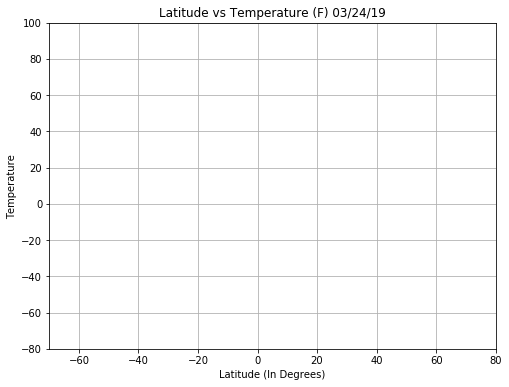

In [24]:
# plot Temperature vs Latitude

plt.figure(figsize=(8,6))
plt.title("Latitude vs Temperature (F) 03/24/19")
plt.xlabel("Latitude (In Degrees)")
plt.ylabel("Temperature")
plt.grid(True)
plt.xlim([-70, 80])
plt.ylim([-80, 100])



plt.scatter(selected_cities["Latitude"],
           selected_cities["Temperature"], linewidths=1, marker="o",facecolors="green", edgecolors="black",
           alpha=0.8)

plt.savefig("Temperature.png")
plt.show()

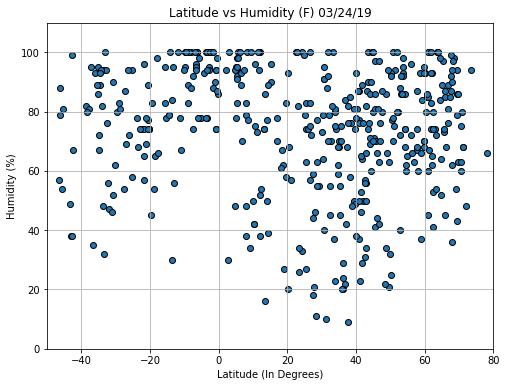

In [21]:
plt.figure(figsize=(8,6))   
plt.scatter(df["Latitude"],
            df["Humidity %"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=1)

plt.title("Latitude vs Humidity (F) 03/24/19")
plt.xlabel("Latitude (In Degrees)")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim([-50, 80])
plt.ylim([0, 110])

# save figure
plt.savefig("Humidity.png")
plt.show()

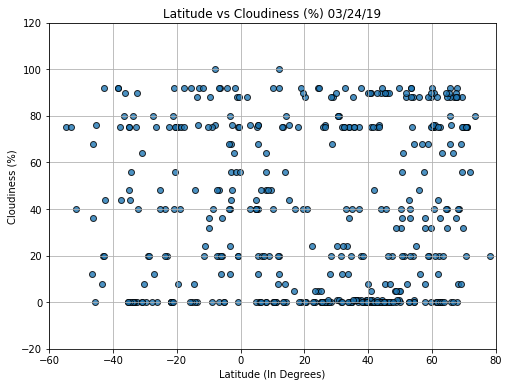

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(df["Latitude"],
           df["Cloudiness %"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Cloudiness (%) 03/24/19")
plt.xlabel("Latitude (In Degrees)")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-20, 120])

# save figure
plt.savefig("Cloudiness.png")
plt.show()

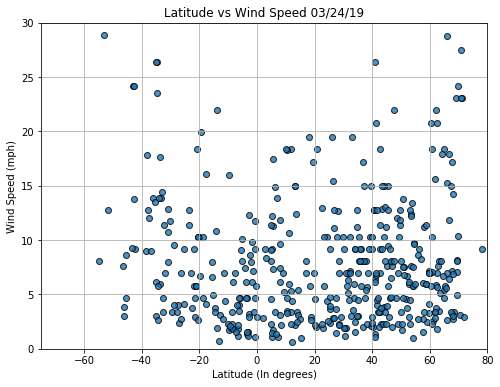

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df["Latitude"],
           df["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8)

plt.title("Latitude vs Wind Speed 03/24/19")
plt.xlabel("Latitude (In degrees)")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-75, 80])
plt.ylim([0, 30])

# save figure
plt.savefig("Wind.png")



Trends:- 

Chart showing Latitute and Temperature depicts cities at the equator have the highest temperatures. Southern hemisphere is relatively warmer than nothern hemisphere. 

The latitude vs humidty chart tells us that humidty levels seem pretty consistent between -50 and 75 degrees latitude. Many citiesh ave humidity above 60%

The latitude vs wind speed chart shows - The south pole below -50 latitude has higher wind speed. Most cities in the chart have wind speeds between 0-15 mph.

